In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd

## Re-make the plot that shows the effect of $\lambda_1$ on $\sigma$ vs. T

In [3]:
# import the data from the csv files
df1=pd.read_csv('sigma_vs_T_lambda1_5_5.csv')
df2=pd.read_csv('sigma_vs_T_lambda1_5_75.csv')
df3=pd.read_csv('sigma_vs_T_lambda1_6.csv')
df4=pd.read_csv('sigma_vs_T_lambda1_6_25.csv')
#put the data back into numpy arrays
T_array_lambda_5_5=df1['T'].to_numpy()
sigma_array_lambda_5_5=df1['sigma'].to_numpy()
T_array_lambda_5_75=df2['T'].to_numpy()
sigma_array_lambda_5_75=df2['sigma'].to_numpy()
T_array_lambda_6=df3['T'].to_numpy()
sigma_array_lambda_6=df3['sigma'].to_numpy()
T_array_lambda_6_25=df4['T'].to_numpy()
sigma_array_lambda_6_25=df4['sigma'].to_numpy()

/var/folders/p2/x0t9bzsx00jdh9552ryvxndm0000gp/T/ipykernel_10580/840146451.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


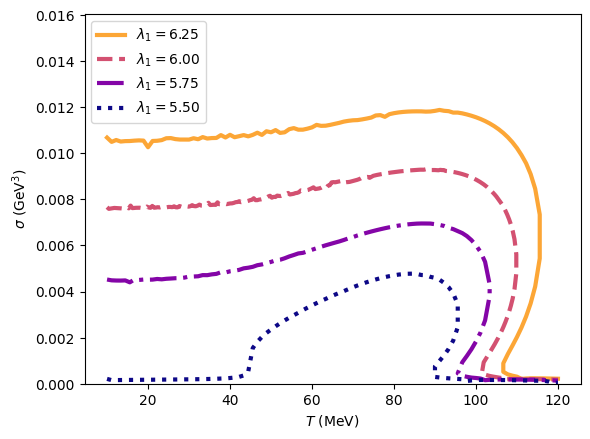

In [28]:
# Number of lines
n_lines = 4

# Create a color map, excluding the upper end of the plasma spectrum
cmap = cm.get_cmap('plasma')
color_indices = np.linspace(0, 0.8, n_lines)  # Stopping at 0.8 to avoid the lightest colors

plt.plot(T_array_lambda_6_25, sigma_array_lambda_6_25/1e9, linestyle='-', color=cmap(color_indices[3]), linewidth=3)
plt.plot(T_array_lambda_6, sigma_array_lambda_6/1e9, linestyle='--', color=cmap(color_indices[2]), linewidth=3)
plt.plot(T_array_lambda_5_75, sigma_array_lambda_5_75/1e9, linestyle='-.', color=cmap(color_indices[1]), linewidth=3)
plt.plot(T_array_lambda_5_5, sigma_array_lambda_5_5/1e9, linestyle=':', color=cmap(color_indices[0]), linewidth=3)




#force the legend to be in the top left
plt.legend(['$\lambda_1=6.25$', '$\lambda_1=6.00$', '$\lambda_1=5.75$', '$\lambda_1=5.50$'],loc='upper left')
plt.ylim([0, 1.35 * np.max(sigma_array_lambda_6_25/1e9)])
plt.xlabel('$T$ (MeV)')
plt.ylabel('$\sigma$ (GeV$^3$)')



# save the plot as a png and an eps file with the name sigma_vs_T and the appropriate lambda1, mq_input, and mu values
plt.savefig('sigma_vs_T_lambda1_compare4_mq='+str(mq_input)+'_mu='+str(mu)+'_plasma_extra_sigfigs.png')
plt.savefig('sigma_vs_T_lambda1_compare4_mq='+str(mq_input)+'_mu='+str(mu)+'_plasma_extra_sigfigs.eps')
plt.show()

In [13]:
#import the data from the csv files into the same arrays as before
df1=pd.read_csv('sigma_vs_T_lambda1_6_25_low_T.csv')
df2=pd.read_csv('sigma_vs_T_lambda1_6_25_high_T.csv')
df3=pd.read_csv('sigma_vs_T_lambda1_5_5.csv')
lowtemps_6_25=df1['T'].to_numpy()
truesigma_low_T_6_25=df1['sigma'].to_numpy()
hightemps_6_25=df2['T'].to_numpy()
truesigma_6_25=np.array([df2['sigma1'].to_numpy(),df2['sigma2'].to_numpy(),df2['sigma3'].to_numpy()]).T

#import the truesigma_5_5 data from the csv file
df=pd.read_csv('sigma_vs_T_lambda1_5_5.csv')
temps=df['T'].to_numpy()
truesigma_5_5=np.zeros((len(temps),3))
truesigma_5_5[:,0]=df['sigma1'].to_numpy()
truesigma_5_5[:,1]=df['sigma2'].to_numpy()
truesigma_5_5[:,2]=df['sigma3'].to_numpy()




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


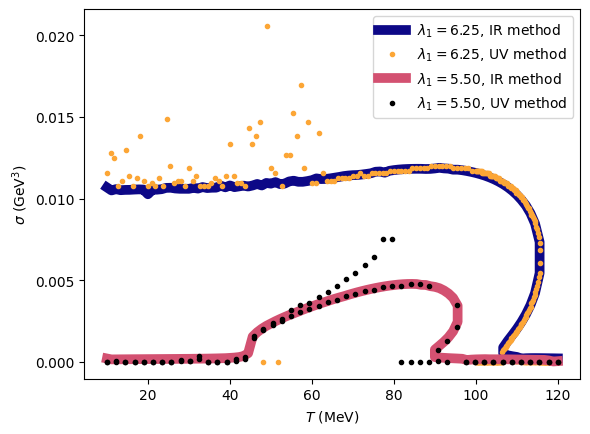

In [16]:
plt.plot(T_array_lambda_6_25, sigma_array_lambda_6_25/1e9, linestyle='-', color=cmap(color_indices[0]), linewidth=7,label='$\lambda_1=6.25$, IR method')
plt.plot(lowtemps_6_25,truesigma_low_T_6_25**3/1e9,'.',color=cmap(color_indices[3]),label = '$\lambda_1=6.25$, UV method')
plt.plot(hightemps_6_25,truesigma_6_25**3/1e9,'.',color=cmap(color_indices[3]))
plt.plot(T_array_lambda_5_5, sigma_array_lambda_5_5/1e9, linestyle='-', color=cmap(color_indices[2]), linewidth=7, label = '$\lambda_1=5.50$, IR method')
plt.plot(temps,truesigma_5_5[:,0]**3/1e9,'.',color='black', label = '$\lambda_1=5.50$, UV method')
plt.plot(temps,truesigma_5_5[:,1:2]**3/1e9,'.',color='black')
# plt.plot(T_array_lambda_5_75, sigma_array_lambda_5_75/1e9, linestyle='-', color=cmap(color_indices[1]), linewidth=5, label = '$\lambda_1=5.75$, IR method')

plt.legend()

plt.xlabel('$T$ (MeV)')
plt.ylabel('$\sigma$ (GeV$^3$)')
#save the plot as a png and an eps file with the name sigma_method_compare and the appropriate lambda1, mq_input, and mu values
mq_input=1
mu=0
plt.savefig('sigma_method_compare_mq='+str(mq_input)+'_mu='+str(mu)+'.png')
plt.savefig('sigma_method_compare_mq='+str(mq_input)+'_mu='+str(mu)+'.eps')
plt.show()

# Phase plots for $m_q=15$ MeV
Including the data found by Robbie and Glenn

In [58]:
# Data arrays
cross_lambda_6_muValues=np.array([0,
50,
100,
150,
200,
250,
275,
285,
290])

cross_lambda_6_Temps=np.array([119.1,
118.76,
116.5,
113.359,
109,
103.775,
100.875,
99.68,
99.069])

FO_lambda_6_muValues=np.array([295,
300,
350,
400,
450,
500,
600,
700,
800,
850,
900,
1000,
1050,
1100,
1200,
1300,
1400,
1500,
1600,
1700,
1800])

FO_lambda_6_Temps=np.array([98.45076531,
97.82857143,
91.33,
84.46,
77.67,
70.46,
56.81,
44.79,
34.18,
29.85,
26.05,
19.1,
16.68,
14.185,
10.49,
7.75,
5.689,
4.144,
2.936,
1.734,
0])

cross_lambda_5_muValues=np.array([0,
50,
100,
150,
200,
250,
300,
350,
400,
450,
500,
525,
530])

cross_lambda_5_Temps=np.array([94.72,
94.1,
92.5,
89.46,
85.73,
80.95,
75.76,
69.63,
63.5,
57.45,
51.6,
48.78,
48.21825])

FO_lambda_5_muValues=np.array([535,
550,
600,
650,
670,
750,
800,
900,
1000,
1050,
1100,
1200,
1300,
1400,
1500,
1600,
1700])

FO_lambda_5_Temps=np.array([47.65994898,
46,
40.19,
33.64,
32.19,
26.53,
22.3,
16.97,
12.31,
10.75,
9.23,
6.96,
4.914,
3.432,
2.439,
1.471,
0])
cross_lambda_45_muValues=np.array([0,
50,
100,
150,
200,
250,
300,
350,
400,
450,
500,
550,
575,
595])

cross_lambda_45_Temps=np.array([75.99,
75.56,
74.14,
72.31,
69.1,
65.91,
62.14,
57.72,
52.61,
47.35,
42.33,
37.5,
35.05,
33.265])

FO_lambda_45_muValues=np.array([600,
650,
700,
800,
850,
900,
1000,
1050,
1100,
1200,
1300,
1400,
1500])

FO_lambda_45_Temps=np.array([32.82755102,
28.681,
24.887,
18.43,
15.694,
12.53,
9.63,
8.21,
7.016,
4.062,
3.198,
1.457,
0])








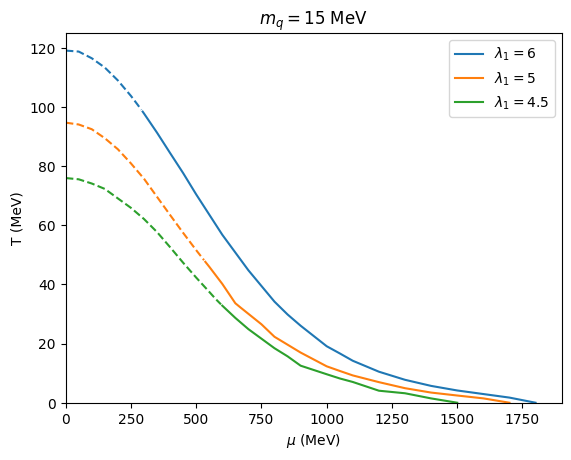

In [18]:
#Plotting with standard matplotlib colors
#define the standard colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#plot the data
plt.plot(cross_lambda_6_muValues,cross_lambda_6_Temps,'--',color=colors[0])
plt.plot(FO_lambda_6_muValues,FO_lambda_6_Temps,label='$\lambda_1=6$',color=colors[0])
plt.plot(cross_lambda_5_muValues,cross_lambda_5_Temps,'--',color=colors[1])
plt.plot(FO_lambda_5_muValues,FO_lambda_5_Temps,label='$\lambda_1=5$',color=colors[1])
plt.plot(cross_lambda_45_muValues,cross_lambda_45_Temps,'--',color=colors[2])
plt.plot(FO_lambda_45_muValues,FO_lambda_45_Temps,label='$\lambda_1=4.5$',color=colors[2])
plt.title('$m_q = 15$ MeV')

#make the plot look nice
plt.xlabel('$\mu$ (MeV)')
plt.ylabel('T (MeV)')
plt.xlim(0,1900)
plt.ylim(0,125)


#make a legend
plt.legend()

# #save the plot as png, pdf, jpg, and eps
# plt.savefig('phaseDiagramPlot_mq_15.png',dpi=500)
# plt.savefig('phaseDiagramPlot_mq_15.pdf')
# plt.savefig('phaseDiagramPlot_mq_15.jpg')
# plt.savefig('phaseDiagramPlot_mq_15.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


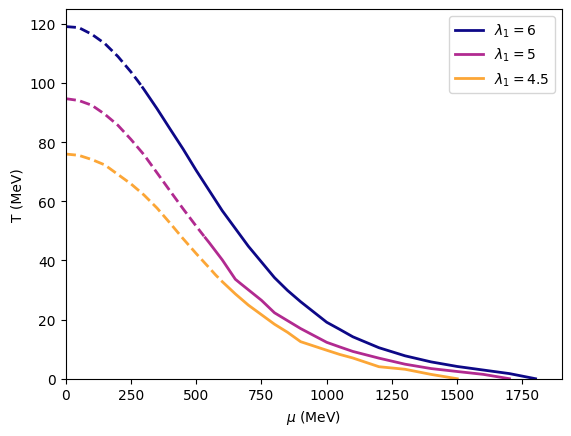

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Use matplotlib.pyplot.colormaps to access the 'plasma' colormap
cmap = plt.colormaps['plasma']
n_colors = 3
color_indices = np.linspace(0, 0.8, n_colors)  # Stopping at 0.8 to avoid the lightest colors
plasma_colors = [cmap(i) for i in color_indices]

# Plotting with thicker lines
line_width = 2
plt.plot(cross_lambda_6_muValues, cross_lambda_6_Temps, '--', color=plasma_colors[0], linewidth=line_width)
plt.plot(FO_lambda_6_muValues, FO_lambda_6_Temps, label='$\lambda_1=6$', color=plasma_colors[0], linewidth=line_width)
plt.plot(cross_lambda_5_muValues, cross_lambda_5_Temps, '--', color=plasma_colors[1], linewidth=line_width)
plt.plot(FO_lambda_5_muValues, FO_lambda_5_Temps, label='$\lambda_1=5$', color=plasma_colors[1], linewidth=line_width)
plt.plot(cross_lambda_45_muValues, cross_lambda_45_Temps, '--', color=plasma_colors[2], linewidth=line_width)
plt.plot(FO_lambda_45_muValues, FO_lambda_45_Temps, label='$\lambda_1=4.5$', color=plasma_colors[2], linewidth=line_width)

# Make the plot look nice
plt.xlabel('$\mu$ (MeV)')
plt.ylabel('T (MeV)')
plt.xlim(0, 1900)
plt.ylim(0, 125)

# Make a legend
plt.legend()

# Uncomment these lines if you wish to save the plot in different formats
plt.savefig('phaseDiagramPlot_mq_15.png', dpi=500)
plt.savefig('phaseDiagramPlot_mq_15.pdf')
plt.savefig('phaseDiagramPlot_mq_15.jpg')
plt.savefig('phaseDiagramPlot_mq_15.eps')

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


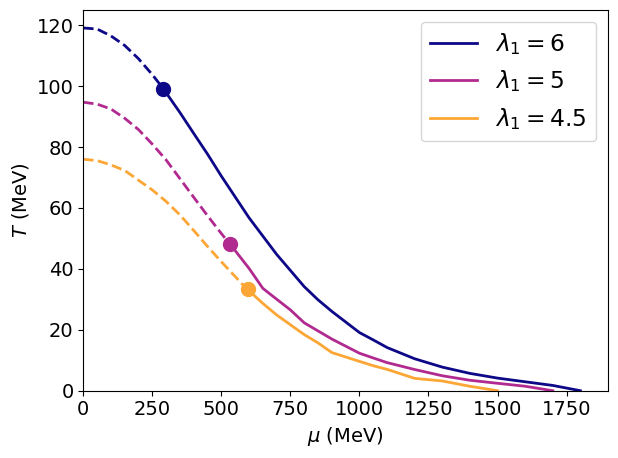

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Increase the base font size
plt.rcParams.update({'font.size': 14})  # Adjust this value as needed

# Your existing colormap and plotting code...
cmap = plt.colormaps['plasma']
n_colors = 3
color_indices = np.linspace(0, 0.8, n_colors)
plasma_colors = [cmap(i) for i in color_indices]

line_width = 2
plt.plot(cross_lambda_6_muValues, cross_lambda_6_Temps, '--', color=plasma_colors[0], linewidth=line_width)
plt.plot(FO_lambda_6_muValues, FO_lambda_6_Temps, label='$\lambda_1=6$', color=plasma_colors[0], linewidth=line_width)
plt.plot(cross_lambda_5_muValues, cross_lambda_5_Temps, '--', color=plasma_colors[1], linewidth=line_width)
plt.plot(FO_lambda_5_muValues, FO_lambda_5_Temps, label='$\lambda_1=5$', color=plasma_colors[1], linewidth=line_width)
plt.plot(cross_lambda_45_muValues, cross_lambda_45_Temps, '--', color=plasma_colors[2], linewidth=line_width)
plt.plot(FO_lambda_45_muValues, FO_lambda_45_Temps, label='$\lambda_1=4.5$', color=plasma_colors[2], linewidth=line_width)
# Adjustments for x and y labels, axes limits
plt.xlabel('$\mu$ (MeV)')
plt.ylabel('$T$ (MeV)')
plt.xlim(0, 1900)
plt.ylim(0, 125)
# Marking the maximum mu value for each "cross" dataset
# Determine the maximum mu value index for each dataset
max_mu_index_6 = np.argmax(cross_lambda_6_muValues)
max_mu_index_5 = np.argmax(cross_lambda_5_muValues)
max_mu_index_45 = np.argmax(cross_lambda_45_muValues)
# Plot a large dot at these points
plt.plot(cross_lambda_6_muValues[max_mu_index_6], cross_lambda_6_Temps[max_mu_index_6], 'o', color=plasma_colors[0], markersize=10)
plt.plot(cross_lambda_5_muValues[max_mu_index_5], cross_lambda_5_Temps[max_mu_index_5], 'o', color=plasma_colors[1], markersize=10)
plt.plot(cross_lambda_45_muValues[max_mu_index_45], cross_lambda_45_Temps[max_mu_index_45], 'o', color=plasma_colors[2], markersize=10)

# Make a legend with larger font
plt.legend(fontsize='large')  # You can specify a numeric value for more precise control

# Trim whitespace
plt.tight_layout()
plt.savefig('phaseDiagramPlot_mq_15.eps')


# Show or save the plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


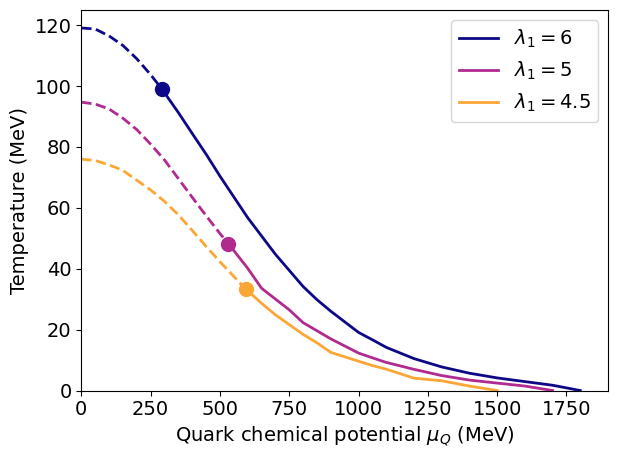

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Increase the base font size
plt.rcParams.update({'font.size': 14})  # Adjust this value as needed


# Colormap and plotting code...
cmap = plt.colormaps['plasma']
n_colors = 3
color_indices = np.linspace(0, 0.8, n_colors)
plasma_colors = [cmap(i) for i in color_indices]

line_width = 2
# plt.plot([], [], ' ', label='Scalar-Dilaton')
# plt.plot([], [], ' ', label='        Coupling')
plt.plot(cross_lambda_6_muValues, cross_lambda_6_Temps, '--', color=plasma_colors[0], linewidth=line_width)
plt.plot(FO_lambda_6_muValues, FO_lambda_6_Temps, label='$\lambda_1=6$', color=plasma_colors[0], linewidth=line_width)
plt.plot(cross_lambda_5_muValues, cross_lambda_5_Temps, '--', color=plasma_colors[1], linewidth=line_width)
plt.plot(FO_lambda_5_muValues, FO_lambda_5_Temps, label='$\lambda_1=5$', color=plasma_colors[1], linewidth=line_width)
plt.plot(cross_lambda_45_muValues, cross_lambda_45_Temps, '--', color=plasma_colors[2], linewidth=line_width)
plt.plot(FO_lambda_45_muValues, FO_lambda_45_Temps, label='$\lambda_1=4.5$', color=plasma_colors[2], linewidth=line_width)
# plt.plot(cross_lambda_45_muValues,120*(1-0.0153*(cross_lambda_45_muValues/120)**2)-.00032*(cross_lambda_45_muValues/120)**4)

# Marking the maximum mu value for each "cross" dataset
# Determine the maximum mu value index for each dataset
max_mu_index_6 = np.argmax(cross_lambda_6_muValues)
max_mu_index_5 = np.argmax(cross_lambda_5_muValues)
max_mu_index_45 = np.argmax(cross_lambda_45_muValues)
# Plot a large dot at these points
plt.plot(cross_lambda_6_muValues[max_mu_index_6], cross_lambda_6_Temps[max_mu_index_6], 'o', color=plasma_colors[0], markersize=10)
plt.plot(cross_lambda_5_muValues[max_mu_index_5], cross_lambda_5_Temps[max_mu_index_5], 'o', color=plasma_colors[1], markersize=10)
plt.plot(cross_lambda_45_muValues[max_mu_index_45], cross_lambda_45_Temps[max_mu_index_45], 'o', color=plasma_colors[2], markersize=10)



# Adjustments for x and y labels, axes limits
plt.xlabel('Quark chemical potential $\mu_Q$ (MeV)')
plt.ylabel('Temperature (MeV)')
plt.xlim(0, 1900)
plt.ylim(0, 125)

# Make a legend with larger font
plt.legend(fontsize=14)  # You can specify a numeric value for more precise control

# Trim whitespace
plt.tight_layout()
plt.savefig('phaseDiagramPlot_mq_15.eps')

# Show or save the plot
plt.show()


# $\sigma$ vs. $m_q$ for two flavor

In [4]:
import pandas as pd
#Now read the data in as numpy arrays
df = pd.read_csv('mq_sigma_50.csv')
mq_50 = df['mq'].to_numpy()
sigma_50 = df['sigma'].to_numpy()

df = pd.read_csv('mq_sigma_59.csv')
mq_59 = df['mq'].to_numpy()
sigma_59 = df['sigma'].to_numpy()

df = pd.read_csv('mq_sigma_60.csv')
mq_60 = df['mq'].to_numpy()
sigma_60 = df['sigma'].to_numpy()

df = pd.read_csv('mq_sigma_62.csv')
mq_62 = df['mq'].to_numpy()
sigma_62 = df['sigma'].to_numpy()

df = pd.read_csv('mq_sigma_65.csv')
mq_65 = df['mq'].to_numpy()
sigma_65 = df['sigma'].to_numpy()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


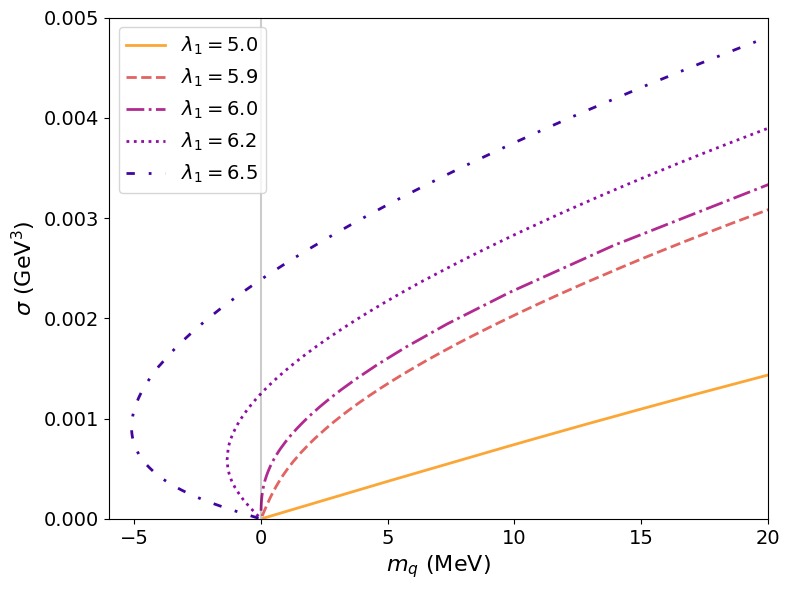

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(mq_50, sigma_50/1e9, color=plt.cm.plasma(0.8), linestyle='-', linewidth=2, label="$\lambda_1 = 5.0$")
plt.plot(mq_59, sigma_59/1e9, color=plt.cm.plasma(0.6), linestyle='--', linewidth=2, label="$\lambda_1 = 5.9$")
plt.plot(mq_60, sigma_60/1e9, color=plt.cm.plasma(0.4), linestyle='-.', linewidth=2, label="$\lambda_1 = 6.0$")
plt.plot(mq_62, sigma_62/1e9, color=plt.cm.plasma(0.3), linestyle=':', linewidth=2, label="$\lambda_1 = 6.2$")
plt.plot(mq_65, sigma_65/1e9, color=plt.cm.plasma(0.1), linestyle=(0, (3, 5, 1, 5)), linewidth=2, label="$\lambda_1 = 6.5$")

plt.xlabel("$m_q$ (MeV)", fontsize=16)
plt.ylabel("$\sigma$ (GeV$^3$)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-6, 20)
plt.ylim(0, .005)
plt.legend(fontsize=14)
plt.tight_layout()

#put a faint vertical line at m_q=0
plt.axvline(x=0, color='black', alpha=0.2)


plt.savefig('sigma_vs_mq_T0_2flavor_subset.eps')
plt.show()

# $\sigma$ vs. $m_q$ for three-flavor

In [11]:
#read in the data
mq_53_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.3.csv')['mq'].to_numpy()
sigma_53_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.3.csv')['sigma'].to_numpy()

mq_55_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.5.csv')['mq'].to_numpy()
sigma_55_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.5.csv')['sigma'].to_numpy()

mq_56_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.6.csv')['mq'].to_numpy()
sigma_56_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.6.csv')['sigma'].to_numpy()

mq_57_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.7.csv')['mq'].to_numpy()
sigma_57_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.7.csv')['sigma'].to_numpy()

mq_58_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.8.csv')['mq'].to_numpy()
sigma_58_3flavor = pd.read_csv('3flavor_mq_sigma_lambda5.8.csv')['sigma'].to_numpy()

mq_60_3flavor = pd.read_csv('3flavor_mq_sigma_lambda6.0.csv')['mq'].to_numpy()
sigma_60_3flavor = pd.read_csv('3flavor_mq_sigma_lambda6.0.csv')['sigma'].to_numpy()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


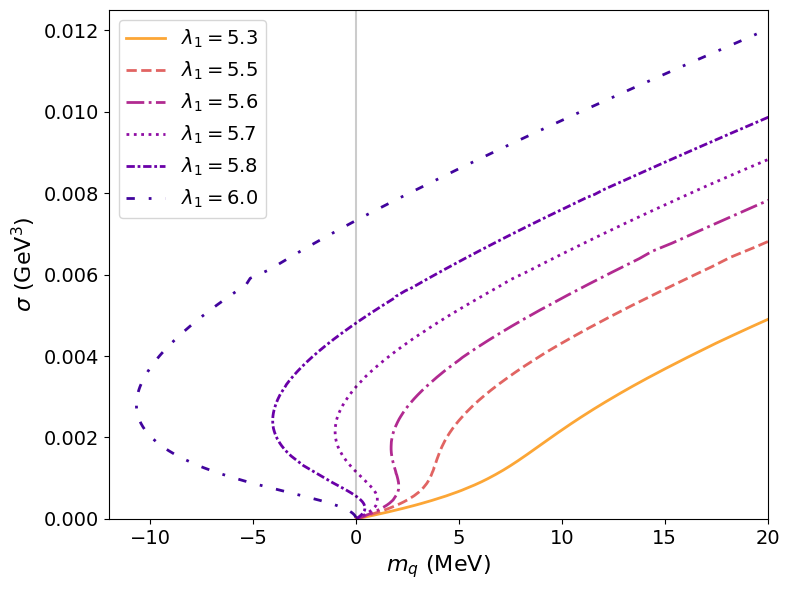

In [55]:
# plot the data in the same style as the 2 flavor plot
plt.figure(figsize=(8, 6))
plt.plot(mq_53_3flavor, sigma_53_3flavor/1e9, color=plt.cm.plasma(0.8), linestyle='-', linewidth=2, label="$\lambda_1 = 5.3$")
plt.plot(mq_55_3flavor, sigma_55_3flavor/1e9, color=plt.cm.plasma(0.6), linestyle='--', linewidth=2, label="$\lambda_1 = 5.5$")
plt.plot(mq_56_3flavor, sigma_56_3flavor/1e9, color=plt.cm.plasma(0.4), linestyle='-.', linewidth=2, label="$\lambda_1 = 5.6$")
plt.plot(mq_57_3flavor, sigma_57_3flavor/1e9, color=plt.cm.plasma(0.3), linestyle=':', linewidth=2, label="$\lambda_1 = 5.7$")
plt.plot(mq_58_3flavor, sigma_58_3flavor/1e9, color=plt.cm.plasma(0.2), linestyle=(0, (3, 1, 1, 1)), linewidth=2, label="$\lambda_1 = 5.8$")
plt.plot(mq_60_3flavor, sigma_60_3flavor/1e9, color=plt.cm.plasma(0.1), linestyle=(0, (3, 5, 1, 5)), linewidth=2, label="$\lambda_1 = 6.0$")

plt.xlabel("$m_q$ (MeV)", fontsize=16)
plt.ylabel("$\sigma$ (GeV$^3$)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-12, 20)
plt.ylim(0, .0125)
plt.legend(fontsize=14)
plt.tight_layout()

#put a faint vertical line at m_q=0
plt.axvline(x=0, color='black', alpha=0.2)

plt.savefig('sigma_vs_mq_T0_3flavor_subset.eps')

plt.show()

# $\sigma$ vs. T in chiral limit

In [30]:
# now read in the csv file
T_array_575=pd.read_csv('T_array_575.csv').to_numpy()
sigma_array_575=pd.read_csv('sigma_array_575.csv').to_numpy()
T_array_6=pd.read_csv('T_array_6.csv').to_numpy()
sigma_array_6=pd.read_csv('sigma_array_6.csv').to_numpy()
T_array_55=pd.read_csv('T_array_55.csv').to_numpy()
sigma_array_55=pd.read_csv('sigma_array_55.csv').to_numpy()
T_array_65=pd.read_csv('T_array_65.csv').to_numpy()
sigma_array_65=pd.read_csv('sigma_array_65.csv').to_numpy()

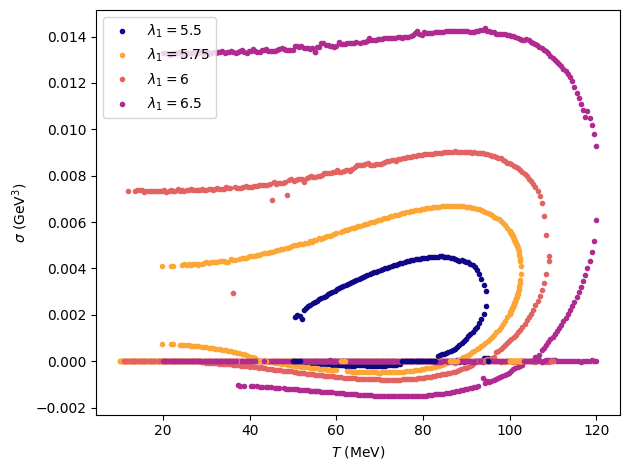

In [37]:
for i in range(3):
    plt.plot(T_array_55, sigma_array_55[i]/1e9, '.', color=plt.cm.plasma(1))
    plt.plot(T_array_575, sigma_array_575[i]/1e9, '.', color=plt.cm.plasma(0.8))
    plt.plot(T_array_6, sigma_array_6[i]/1e9, '.', color=plt.cm.plasma(0.6))
    plt.plot(T_array_65, sigma_array_65[i]/1e9, '.', color=plt.cm.plasma(0.4))

plt.xlabel('$T$ (MeV)')
plt.ylabel('$\sigma$ (GeV$^3$)')
# create a legend in the top left
plt.legend(['$\lambda_1=5.5$', '$\lambda_1=5.75$', '$\lambda_1=6$','$\lambda_1=6.5$'],loc='upper left')
# plt.legend()
#pad the plot so the legend doesn't overlap with the data
plt.tight_layout()


plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


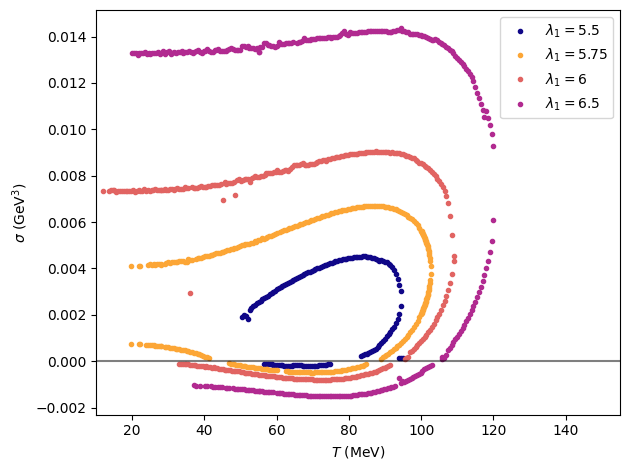

In [44]:
for i in range(3):
    # For T_array_55 and corresponding sigma_array_55, checking absolute value
    mask_55 = np.abs(sigma_array_55[i]) >= 1e5
    plt.plot(T_array_55[mask_55], (sigma_array_55[i][mask_55])/1e9, '.', color=plt.cm.plasma(1))

    # Repeat the process for T_array_575 and sigma_array_575
    mask_575 = np.abs(sigma_array_575[i]) >= 1e5
    plt.plot(T_array_575[mask_575], (sigma_array_575[i][mask_575])/1e9, '.', color=plt.cm.plasma(0.8))

    # And so on for the other arrays
    mask_6 = np.abs(sigma_array_6[i]) >= 1e5
    plt.plot(T_array_6[mask_6], (sigma_array_6[i][mask_6])/1e9, '.', color=plt.cm.plasma(0.6))

    mask_65 = np.abs(sigma_array_65[i]) >= 1e5
    plt.plot(T_array_65[mask_65], (sigma_array_65[i][mask_65])/1e9, '.', color=plt.cm.plasma(0.4))

plt.xlabel('$T$ (MeV)')
plt.ylabel('$\sigma$ (GeV$^3$)')
plt.legend(['$\lambda_1=5.5$', '$\lambda_1=5.75$', '$\lambda_1=6$','$\lambda_1=6.5$'], loc='upper right')
#draw a faint horizontal line at sigma=0
plt.axhline(y=0, color='black', alpha=0.5)
#make the x axis go from 0 to 125
plt.xlim(10, 155)
plt.tight_layout()
#save the figure as a png and an eps file
plt.savefig('sigma_vs_T_3_flavor_chiral.png')
plt.savefig('sigma_vs_T_3_flavor_chiral.eps')
plt.savefig('sigma_vs_T_3_flavor_chiral.svg')
plt.show()

Painstakingly joining all the segments for $\lambda_1=5.75$ in order

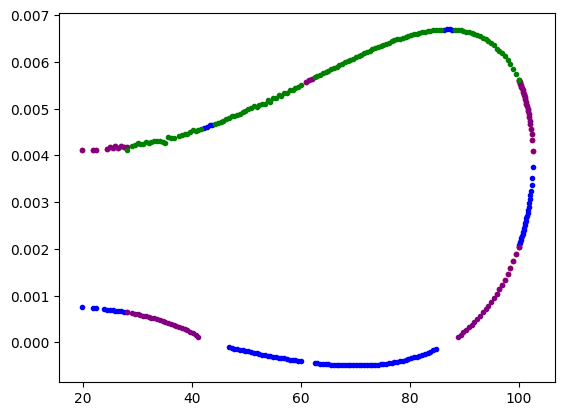

In [85]:
mask_0 = np.abs(sigma_array_575[0]) >= 1e5
mask_1 = sigma_array_575[1] >= 1e6
mask_2 = np.abs(sigma_array_575[2]) >= 1e4

mask_11=np.abs(sigma_array_575[1])>=1e5

plt.plot(T_array_575[mask_0], (sigma_array_575[0][mask_0])/1e9, '.',color='blue')
plt.plot(T_array_575[mask_1], (sigma_array_575[1][mask_1])/1e9, '.',color='red')
plt.plot(T_array_575[mask_11], (sigma_array_575[1][mask_11])/1e9, '.',color='purple')
plt.plot(T_array_575[mask_2], (sigma_array_575[2][mask_2])/1e9, '.',color='green')

plt.show()

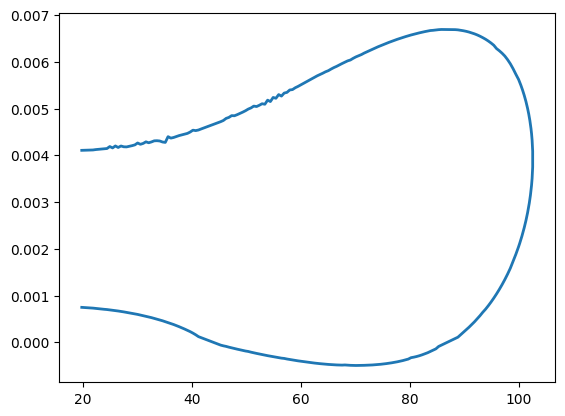

In [90]:
#create a new empty array for temperature, and one for sigma
T_new_575 = np.array([])
sigma_new_575 = np.array([])
#append the sigma values from sigma_array_575[1][mask_1] for temperature values less than 40 
for i in range(len(T_array_575[mask_1])):
    if T_array_575[mask_1][i] < 40:
        T_new_575 = np.append(T_new_575, T_array_575[mask_1][i])
        sigma_new_575 = np.append(sigma_new_575, sigma_array_575[1][mask_1][i])

#append the sigma values from sigma_array_575[2][mask_2] for temperature values greater than the maximum temperature in T_new_575
for i in range(len(T_array_575[mask_2])):
    if T_array_575[mask_2][i] > np.max(T_new_575):
        T_new_575 = np.append(T_new_575, T_array_575[mask_2][i])
        sigma_new_575 = np.append(sigma_new_575, sigma_array_575[2][mask_2][i])

#apppend the sigma values from sigma_array_575[1][mask_1] for temperature values greater than the maximum temperature in T_new_575
for i in range(len(T_array_575[mask_1])):
    if T_array_575[mask_1][i] > np.max(T_new_575):
        T_new_575 = np.append(T_new_575, T_array_575[mask_1][i])
        sigma_new_575 = np.append(sigma_new_575, sigma_array_575[1][mask_1][i])

starting_index=len(T_array_575)-5
for i in range(starting_index,0,-1):

    if sigma_array_575[0][i] <= 1e5:
        break
    else:
        T_new_575 = np.append(T_new_575, T_array_575[i])
        sigma_new_575 = np.append(sigma_new_575, sigma_array_575[0][i])
        # T_new_575 = np.insert(T_new_575,0,T_array_575[i])
        # sigma_new_575 = np.insert(sigma_new_575,0,sigma_array_575[0][i])
        new_index=i

for i in range(new_index-1,0,-1):
    if sigma_array_575[1][i] <= 1e5:
        break
    else:
        T_new_575 = np.append(T_new_575, T_array_575[i])
        sigma_new_575 = np.append(sigma_new_575, sigma_array_575[1][i])
        # T_new_575 = np.insert(T_new_575,0,T_array_575[i])
        # sigma_new_575 = np.insert(sigma_new_575,0,sigma_array_575[1][i])
        new_index=i

for i in range(new_index-1,0,-1):
    if T_array_575[i] < 45:
        break
    else:
        if sigma_array_575[0][i] < 0:
            
            T_new_575 = np.append(T_new_575, T_array_575[i])
            sigma_new_575 = np.append(sigma_new_575, sigma_array_575[0][i])
            # T_new_575 = np.insert(T_new_575,0,T_array_575[i])
            # sigma_new_575 = np.insert(sigma_new_575,0,sigma_array_575[0][i])
            new_index=i

# create new empty arrays called T_last_575 and sigma_last_575
T_last_575 = np.array([])
sigma_last_575 = np.array([])
# append the sigma values from sigma_array_575[0][mask_0] for temperature values less than 40
for i in range(len(T_array_575[mask_0])):
    if T_array_575[mask_0][i] < 40:
        T_last_575 = np.append(T_last_575, T_array_575[mask_0][i])
        sigma_last_575 = np.append(sigma_last_575, sigma_array_575[0][mask_0][i])

# append the sigma values from sigma_array_575[1][mask_1] for temperature values greater than the maximum temperature in T_last_575 for temperature values less than 45
for i in range(len(T_array_575[mask_11])):
    if T_array_575[mask_11][i] > np.max(T_last_575) and T_array_575[mask_11][i] < 45:
        T_last_575 = np.append(T_last_575, T_array_575[mask_11][i])
        sigma_last_575 = np.append(sigma_last_575, sigma_array_575[1][mask_11][i])

#reverse the order of the arrays and append to T_new_575 and sigma_new_575
T_new_575 = np.append(T_new_575, T_last_575[::-1])
sigma_new_575 = np.append(sigma_new_575, sigma_last_575[::-1])

plt.plot(T_new_575, sigma_new_575/1e9,linewidth=2)
plt.show()

Doing the same for $\lambda_1=5.75$

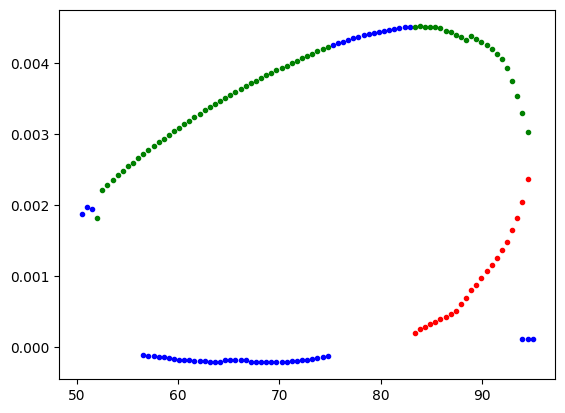

In [93]:
mask_55_0=np.abs(sigma_array_55[0])>=1e5
mask_55_1=np.abs(sigma_array_55[1])>=1e5
mask_55_2=np.abs(sigma_array_55[2])>=1e5
#plot all the masked data for sigma=5.5

plt.plot(T_array_55[mask_55_0], sigma_array_55[0][mask_55_0]/1e9, '.', color='blue')
plt.plot(T_array_55[mask_55_1], sigma_array_55[1][mask_55_1]/1e9, '.', color='red')
plt.plot(T_array_55[mask_55_2], sigma_array_55[2][mask_55_2]/1e9, '.', color='green')

plt.show()

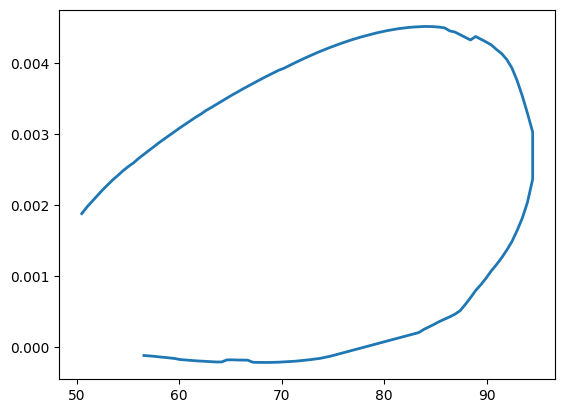

In [128]:
# Create a new empty array for temperature and one for sigma
T_new_55 = np.array([])
sigma_new_55 = np.array([])
#append the first two masked sigma values from sigma_array_55[0] 
for i in range(2):
    T_new_55 = np.append(T_new_55, T_array_55[mask_55_0][i])
    sigma_new_55 = np.append(sigma_new_55, sigma_array_55[0][mask_55_0][i])

#append the sigma values from sigma_array_55[2] until reaching an index where the sigma value is less than 1e5
for i in range(5,len(T_array_55)):
    if sigma_array_55[2][i] < 1e5:
        break
    else:
        T_new_55 = np.append(T_new_55, T_array_55[i])
        sigma_new_55 = np.append(sigma_new_55, sigma_array_55[2][i])
        new_index=i

#append the sigma values from sigma_array_55[0] until reaching an index where the sigma value is less than 1e5
for i in range(new_index+1,len(T_array_55)-1,1):
    if sigma_array_55[0][i] < 1e5:
        break
    else:
        T_new_55 = np.append(T_new_55, T_array_55[i])
        sigma_new_55 = np.append(sigma_new_55, sigma_array_55[0][i])
        new_index=i
    
#append the sigma values from sigma_array_55[2] until reaching an index where the sigma value is less than 1e5
for i in range(new_index+1,len(T_array_55)-1,1):
    if sigma_array_55[2][i] < 1e5:
        break
    else:
        T_new_55 = np.append(T_new_55, T_array_55[i])
        sigma_new_55 = np.append(sigma_new_55, sigma_array_55[2][i])
        new_index=i

#create new empty arrays called T_last_55 and sigma_last_55
T_last_55 = np.array([])
sigma_last_55 = np.array([])
#append the sigma values from sigma_array_55[0][mask_55_0] for temperature values greater than 55 until reaching an index where the absolute value of sigma is less than 1e5. Start at low temperatures and work up. DOn't mask the data
for i in range(13,len(T_array_55)-1,1):
    if np.abs(sigma_array_55[0][i]) < 1e5:
        break
    if sigma_array_55[0][i] > 0:
        break
    else:
        T_last_55 = np.append(T_last_55, T_array_55[i])
        sigma_last_55 = np.append(sigma_last_55, sigma_array_55[0][i])
        new_index=i

# append sigma_array_55_[1][mask_55_1] for temperature values greater than the maximum temperature in T_last_55
for i in range(new_index+1,len(T_array_55)-1,1):

    if np.abs(sigma_array_55[1][i]) > 1e0:
        T_last_55 = np.append(T_last_55, T_array_55[i])
        sigma_last_55 = np.append(sigma_last_55, sigma_array_55[1][i])
        new_index=i

#reverse the order of the arrays and append to T_new_55 and sigma_new_55
T_new_55 = np.append(T_new_55, T_last_55[::-1])
sigma_new_55 = np.append(sigma_new_55, sigma_last_55[::-1])

plt.plot(T_new_55, sigma_new_55/1e9,linewidth=2)
# plt.plot(T_last_55, sigma_last_55/1e9,linewidth=2)
plt.show()

Doing the same for $\lambda_1=6$

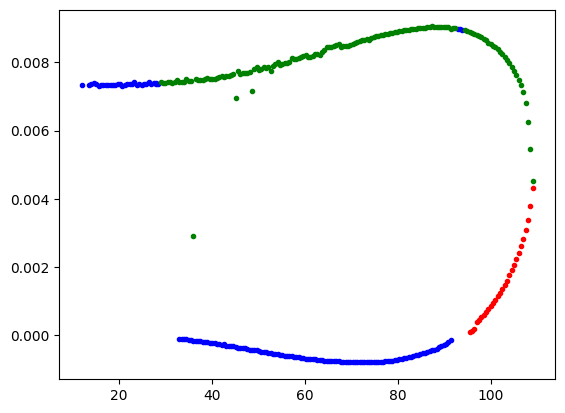

In [132]:
# create masks for the lambda=6 data
mask_6_0 = np.abs(sigma_array_6[0]) >= 1e5
mask_6_1 = np.abs(sigma_array_6[1]) >= 1e5 
mask_6_2 = np.abs(sigma_array_6[2]) >= 1e5

#plot all the masked data for lambda=6
plt.plot(T_array_6[mask_6_0], sigma_array_6[0][mask_6_0]/1e9, '.', color='blue')
plt.plot(T_array_6[mask_6_1], sigma_array_6[1][mask_6_1]/1e9, '.', color='red')
plt.plot(T_array_6[mask_6_2], sigma_array_6[2][mask_6_2]/1e9, '.', color='green')

plt.show()


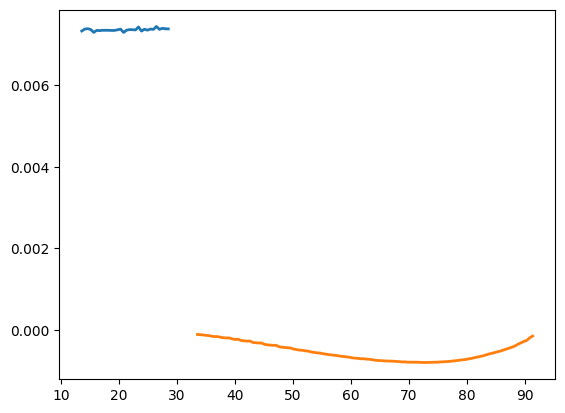

In [140]:
# create a new empty array for temperature and one for sigma
T_new_6 = np.array([])
sigma_new_6 = np.array([])
#append the values from sigma_array_6[0] until there is a big drop in sigma
for i in range(5,len(T_array_6)):
    if sigma_array_6[0][i] < 1e5:
        break
    else:
        T_new_6 = np.append(T_new_6, T_array_6[i])
        sigma_new_6 = np.append(sigma_new_6, sigma_array_6[0][i])
        new_index=i

#create new empty arrays called T_last_6 and sigma_last_6
T_last_6 = np.array([])
sigma_last_6 = np.array([])
#append the values from sigma_array_6[0] until there is a big drop in sigma
for i in range(new_index+10,len(T_array_6)-1,1):
    if np.abs(sigma_array_6[0][i]) < 1e5:
        break
    else:
        T_last_6 = np.append(T_last_6, T_array_6[i])
        sigma_last_6 = np.append(sigma_last_6, sigma_array_6[0][i])
        new_index_2=i

plt.plot(T_new_6, sigma_new_6/1e9,linewidth=2)
plt.plot(T_last_6, sigma_last_6/1e9,linewidth=2)
plt.show()

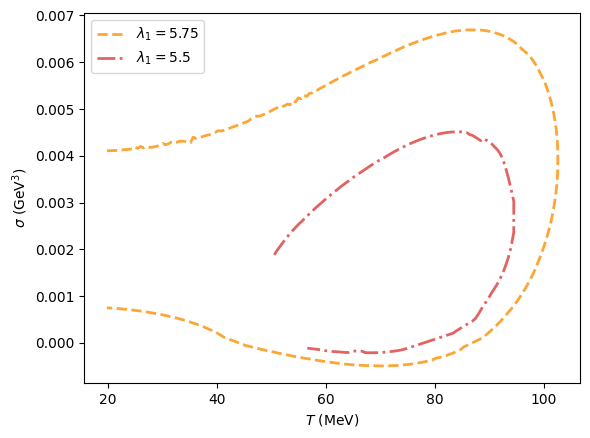

In [131]:
#plot the new sigma arrays with different line styles, thickness=2, and plasma color scheme, avoiding the yellow end of the spectrum
plt.plot(T_new_575, sigma_new_575/1e9, linewidth=2, color=plt.cm.plasma(0.8),linestyle='--')
plt.plot(T_new_55, sigma_new_55/1e9, linewidth=2, color=plt.cm.plasma(0.6),linestyle='-.')

plt.xlabel('$T$ (MeV)')
plt.ylabel('$\sigma$ (GeV$^3$)')
plt.legend(['$\lambda_1=5.75$', '$\lambda_1=5.5$'])
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


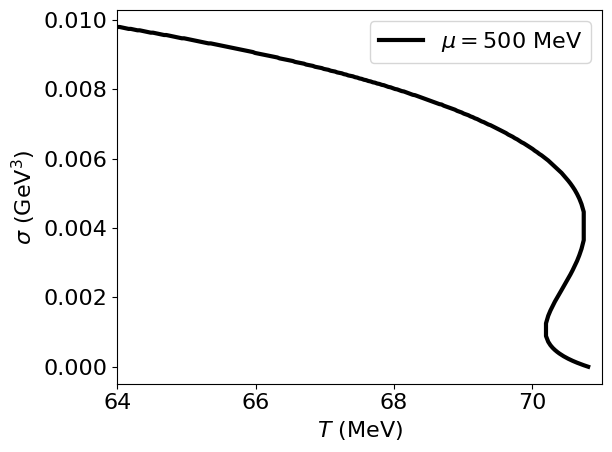

In [85]:
# read in sigmaVsT_lambda_6_mq_15_mu_500.csv for temperature and sigma values
# there are no headers. the first column is the temperature and the second column is the sigma value
T_array=pd.read_csv('sigmaVsT_lambda_6_mq_15_mu_500.csv',header=None).to_numpy()[:,0]
sigma_array=pd.read_csv('sigmaVsT_lambda_6_mq_15_mu_500.csv',header=None).to_numpy()[:,1]
# make all the fonts size 16
plt.rcParams.update({'font.size': 16})

# plot the data
plt.plot(T_array, sigma_array, color='black', linestyle='-', linewidth=3)
#create a legend with a label for the mu value
plt.legend(['$\mu=500$ MeV'])
plt.xlabel('$T$ (MeV)')
plt.ylabel('$\sigma$ (GeV$^3$)')
# make the x range from 64 to the maximum value of T_array
plt.xlim(64, np.max(T_array)+.2)
#trim the whitespace
plt.tight_layout()

#save the plot as a png and an eps file with the name sigma_vs_T and the appropriate lambda1, mq_input, and mu values
plt.savefig('sigma_vs_T_lambda1_6_mq_15_mu_500.png')
plt.savefig('sigma_vs_T_lambda1_6_mq_15_mu_500.eps')

plt.show()




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


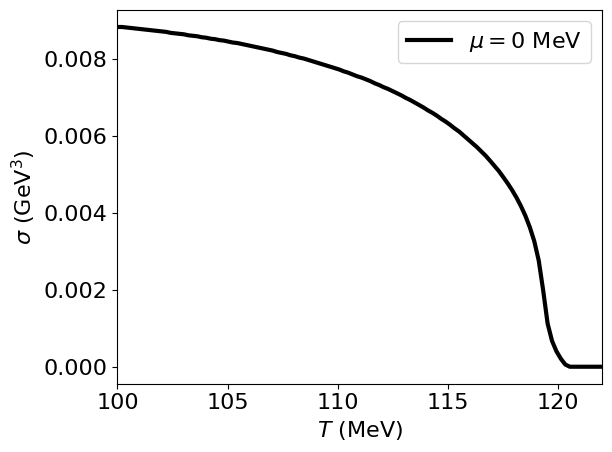

In [93]:
# do the same as the cell above, except mu=0
T_array_0=pd.read_csv('sigmaVsT_lambda_6_mq_15_mu_0.csv',header=None).to_numpy()[:,0]
sigma_array_0=pd.read_csv('sigmaVsT_lambda_6_mq_15_mu_0.csv',header=None).to_numpy()[:,1]
# make all the fonts size 16
plt.rcParams.update({'font.size': 16})

plt.plot(T_array_0, sigma_array_0, color='black', linestyle='-', linewidth=3)
plt.legend(['$\mu=0$ MeV'])
plt.xlabel('$T$ (MeV)')
plt.ylabel('$\sigma$ (GeV$^3$)')
plt.xlim(100, 122)
plt.tight_layout()
# save the plot as a png and an eps file with the name sigma_vs_T and the appropriate lambda1, mq_input, and mu values
plt.savefig('sigma_vs_T_lambda1_6_mq_15_mu_0.png')
plt.savefig('sigma_vs_T_lambda1_6_mq_15_mu_0.eps')
plt.show()


